# EDA on Training Set
Exploration is performed on training only set to prevent 'data snooping bias'.

### Import libraries and load data


In [2]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); color='rebeccapurple'
%matplotlib inline  

# display settings
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_columns', None)  

In [3]:
# load training set as saved in 'ML Model Evaluation.ipynb'
eda = pd.read_csv('data/trainSetForEDA.csv')

## Have a look at data structure

In [4]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20793 entries, 0 to 20792
Data columns (total 39 columns):
id                        20793 non-null int64
message                   20793 non-null object
original                  8035 non-null object
genre                     20793 non-null object
related                   20793 non-null int64
request                   20793 non-null int64
offer                     20793 non-null int64
aid_related               20793 non-null int64
medical_help              20793 non-null int64
medical_products          20793 non-null int64
search_and_rescue         20793 non-null int64
security                  20793 non-null int64
military                  20793 non-null int64
water                     20793 non-null int64
food                      20793 non-null int64
shelter                   20793 non-null int64
clothing                  20793 non-null int64
money                     20793 non-null int64
missing_people            20793 non-null in

In [5]:
eda.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,30264,"Some 2,000 women protesting against the conduct of the elections were teargassed as they tried to converge on the local electoral commission offices in the southern oil city of Port Harcourt.",NaN,news,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,583,Good evening to all USA soldiers. we still suffer from this great event. We would love to handle your presence of authority. thank you,bon soir a tous les soldats usa nous sommes toujours subis a cet evenement du cote grand anse nous aimerons votre presence de l autorite merci,direct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14216,"neither i have got any ration nor tent till date, now winter is also approaching. what should i do?","Abdul waheed s/o Faizullah r/o shadi khel u/c Gul Imam Distt:Tank kpk. Aj tak hamay na rashan mili hai, na tents ab to winter b agaya hai. Aakher Kia kare?",direct,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,22848,"Houses 1,262 Two-storied residential buildings 4 Office buildings 40 Dams with stone slopes 200 m Iron/concrete road bridge (+access road) 1 10 KV HV line 15 km 0.4 KV HV line 46 km Assembled transformer stations 31 Cables 12 km Cable drainage systems 4,5 km Communication poles (wood) 23 Asphalt roads 8 km Gravel and earth roads 38 km Water supply network 15 km Irrigation network 25 km Flooded area 1,204 hectares",NaN,news,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,12952,Can help w food .. .anything . cleaning,NaN,direct,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Explore target class distribution

For a stratified split into test and training sets, the target class distribution has to be known and understood

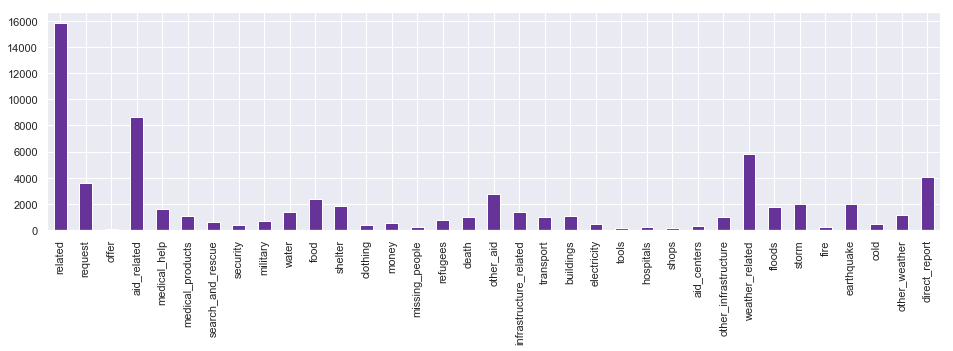

In [6]:
# check for general target class distribution
plt.figure(figsize=(16,4))
eda.iloc[:,4:40].sum().plot.bar(color=color);

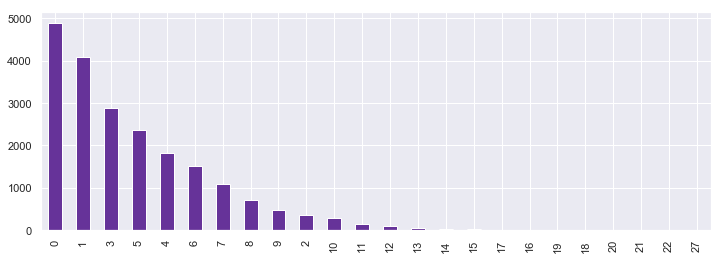

In [8]:
# check for distribution of different numbers of target categories per message

# create new column with total of active categories per message
eda['total'] = eda.iloc[:,4:40].sum(axis=1)
# plot the result
plt.figure(figsize=(12,4))
eda['total'].value_counts().plot.bar(color=color);

In [9]:
# check for most frequent category counts per message
eda['total'].value_counts().head()

0    4893
1    4092
3    2882
5    2360
4    1818
Name: total, dtype: int64

In [11]:
# check a sample of messages with 0 active categories
eda.loc[(eda['total'] == 0), ['message']].sample(5)

,message
14941,Thank you. I'm in the Northwest in the countryside. I'm not able to find any cyber cafe that functions. I'm going to see if I can listen to the radio
15612,"As reported at the conference, UNDP has recently completed research, which quantifies the economic and social impact of water and energy tariff increases on the poor and of their limited access to these essential services in the Kyrgyz Republic and Tajikistan."
6658,It is a comprehensive strategy that requires a united and sustained approach by the international community.
16150,"The new building complies to the newest standards for child-friendly living spaces, and its innovative energy system is based on an independent energy supply with solar panels and a biomass heating system."
3842,"This ideology, which resulted from ""uninformed outsiders"" linking up with ""pseudo-ideologists"", was not aligned with the people's real interests."


In [12]:
# check a sample of messages with 1 active categories
eda.loc[(eda['total'] == 1), ['message']].sample(5)

,message
7713,Are there any centres to help with distrubuting help? Myseld and 2 friends would like to help you. We are students from school. Thank you
9709,"am a youth who need to study, to useful my country, I do not have the means.I would like to Haitian government and the community international help me."
19727,I have a message to send. Can you help me?
5731,"People are so judgmental.. Even in times like this! #sosad #liveandletlive #Sandy@Foxchick242 @mittromney I'm fine,,my powers been on since Thursday. #SandyNJ"
13586,WHAT IS THE GOUVERNMENT GOING TO DO WITH ALL THOSE BROCKEN HOUSES?


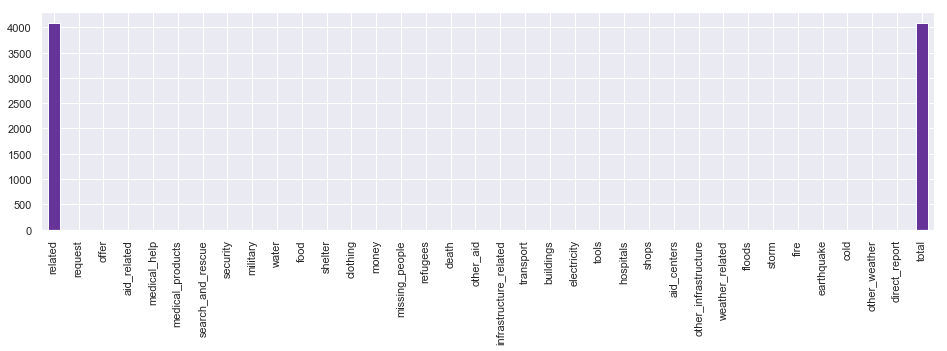

In [14]:
# check which categories are active for plots with category count of 1
eda_temp1 = eda.loc[(eda['total'] == 1)]
# plot the result
plt.figure(figsize=(16,4))
eda_temp1.iloc[:,4:40].sum().plot.bar(color=color);

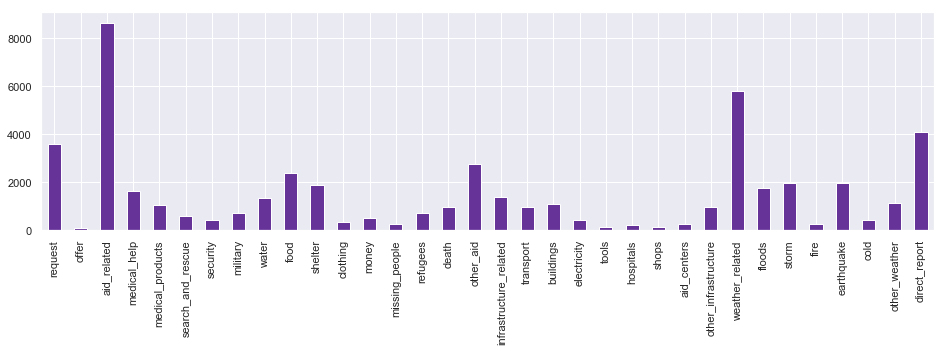

In [16]:
# distribution of the categories for related and categorized messages only (excluding category 'related')
eda_categorized = eda.loc[(eda['total'] > 1)]
# plot the result
plt.figure(figsize=(16,4))
eda.iloc[:,5:39].sum().plot.bar(color=color);

__Observation:__  Categories are imbalanced, this will have to be taken into account for model training

### Check 'outlier messages' > 10 active categories

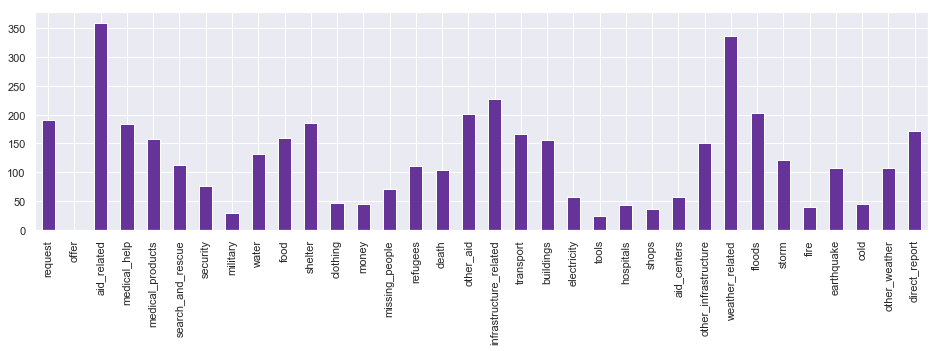

In [17]:
# check if 'outlier messages' with more than 10 categories have some special distribution
eda_outliers = eda.loc[(eda['total'] > 10)]
# plot the result
plt.figure(figsize=(16,4))
eda_outliers.iloc[:,5:39].sum().plot.bar(color=color);

In [18]:
## print number / proportion of those messages
print("Messages with > 10 active categories: {} ({}% of total)" \
      .format(len(eda_outliers), round(100*(len(eda_outliers)/len(eda)),2)))

Messages with > 10 active categories: 360 (1.73% of total)


In [19]:
# look at sample of messages with more than 20 active categories
eda.loc[(eda['total'] > 10)][['message']].sample(5)

,message
11268,"District 7020 is collecting funds to purchase the following goods locally: batteries, drinking water, charcoal, rice, cooking oil, sugar, cream, propane stoves & canisters, canned goods, bread, fruit, cereal, flour, baby food, diapers, and generators."
6460,"Two C-130 transports left Subang yesterday with shipments of fortified biscuits, bound for Banda Aceh."
10726,"There's nothing to eat and water, we starving and thirsty."
12616,"In partnership with these NGOs, World Vision is providing supply tents, blankets, cooking utensils, food, water-drilling equipment and other emergency supplies needed for refugee camps."
1553,"The garment sector, one of Bangladesh's main export earners, has lost over ¬¨¬£276 million."


In [20]:
# check genre of these outliers
eda_outliers['genre'].value_counts()

news      195
direct    146
social    19 
Name: genre, dtype: int64

C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


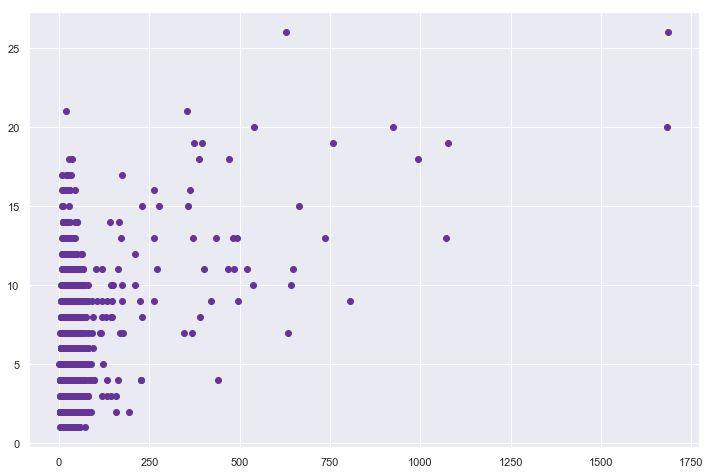

In [21]:
# check for correlation between message length (in words) and number of active categories

# generate necessary columns
eda_categorized['n_categories'] = eda_categorized['total'] -1 # remove 'related' from count
eda_categorized['message_length'] = eda_categorized['message'].apply(lambda x : len(x.split())) # get message length

# plot the results
plt.figure(figsize=(12,8))
plt.scatter(eda_categorized['message_length'], eda_categorized['n_categories'], color=color);

In [22]:
# print pearson's r for the two columns
np.corrcoef(eda_categorized['message_length'], eda_categorized['n_categories'])[0][1]

0.28603615759665774

In [23]:
# check mean length of different groups of messages
print('all messages   {:6f}'.format(eda_categorized['total'].mean()))
print('all related messages   {:6f}'.format(eda.loc[eda['related'] == 1]['total'].mean()))
print('all aid related messages   {:6f}'.format(eda.loc[eda['aid_related'] == 1]['total'].mean()))
print('all infrastructure related messages   {:6f}'.format(eda.loc[eda['infrastructure_related'] == 1]['total'].mean()))
print('all weather related messages   {:6f}'.format(eda.loc[eda['weather_related'] == 1]['total'].mean()))

all messages   5.263720
all related messages   4.166415
all aid related messages   5.898407
all infrastructure related messages   8.171119
all weather related messages   6.004132


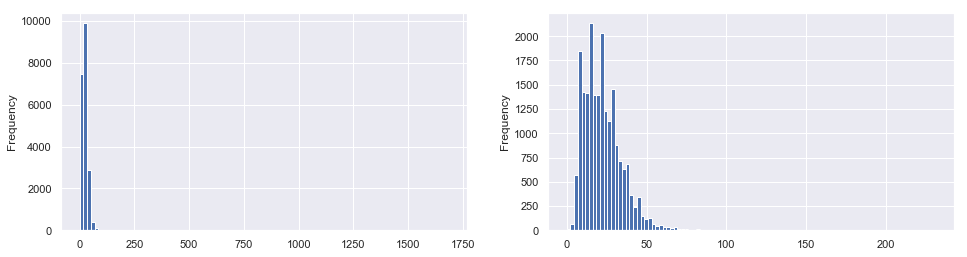

In [24]:
# check distribution of message length's (all messages)
eda['message_length'] = eda['message'].apply(lambda x : len(x.split())) # get message length
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
eda['message_length'].plot.hist(bins=100)
plt.subplot(1,2,2)
eda['message_length'].loc[eda['message_length'] <250].plot.hist(bins=100);

__Observations__: The Distribution of the 'oultier messages' is not very different from the total distribution and the correlation between message length and number of categories is positive but weak. It seems, that the long messages are mostly reports, probably by professional staff (NGOs, Journalists etc.) and not calls for help.

### Check influence of column 'genre'

In [25]:
# check proportion of related messages per genre
print('overall   {:6f}'.format(eda['related'].mean()))
eda.groupby('genre') ['related'].mean()

overall   0.764680


genre
direct    0.676149
news      0.817641
social    0.872523
Name: related, dtype: float64

In [26]:
# check mean number of categories for related messages per genre
print('overall   {:6f}'.format(eda_categorized['total'].mean()))
eda_categorized.groupby('genre') ['total'].mean()

overall   5.263720


genre
direct    5.598615
news      5.132584
social    4.824024
Name: total, dtype: float64

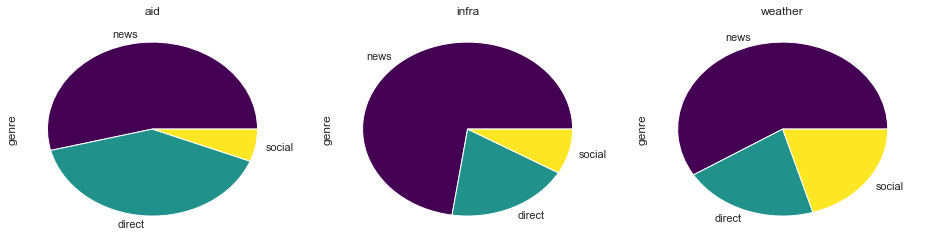

In [27]:
# check influence of main categories on genre (or vice versa)

# create dataframes for plotting
eda_aid = eda.loc[eda['aid_related'] == 1]
eda_infra = eda.loc[eda['infrastructure_related'] == 1]
eda_weather = eda.loc[eda['weather_related'] == 1]
# plot the results
plt.figure(figsize=(16,4))
i = 0
for df, label in [(eda_aid, 'aid'), (eda_infra, 'infra'), (eda_weather, 'weather')]:
    i += 1
    plt.subplot(1,3, i)
    plt.title(label)
    df['genre'].value_counts().plot.pie(cmap='viridis');

__Observations__
- There are significantly less disaster related messages in genre direct than in genres news and especially social
- the mean number of categories per message is around 5 for all genres, interesingly it is going down the more messages are related.
- The proportions of the different genres differ within the main categories.